In [51]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from datetime import datetime, date, timedelta

import yfinance as yfin
from var import VaR
import scipy.stats

import matplotlib.pyplot as plt
#from yahoofinancials import YahooFinancials

# Assignment
Create a Github account if you do not already have one and download a VAR library.
Using the library that you have chosen and historical data (available from Yahoo Finance and other sources) calculate the VaR for your  investment portfolio.
Document your work in a presentation and post it to the Discussion Forum and comment on and discuss the document and posted work of others.

# Variables

In [52]:
start_date = datetime(2020, 1, 1)
end_date = datetime.now()
alpha = 0.05

yfin.pdr_override()

#start_date = "2022-01-01"
#end_date = "2023-08-31"
#alpha = 0.01

# Functions

# Load Data

In [53]:
folio_df = pd.read_csv('./data/DATA618_w5_Portfolio.csv', 
                 dtype={
                    'ID': 'int',
                    'Price': 'float',
                    'Shares': 'float',
                    'Value': 'float', 
                 })


folio_df = folio_df[folio_df['Shares'] > 0]
folio_df = folio_df.groupby(['Ticker']).sum()
folio_df['Morningstar_Category'].fillna('Other', inplace=True)
folio_df.reset_index(inplace=True)
folio_df.drop(columns='ID', inplace=True)
folio_df

,Ticker,BondName,Morningstar_Category,Class,Sub_Class,Price,Shares,Value
0,ALTVX,AB Municipal Income National Advisor,Muni National Interm,Interest Rate Sensitive Exposures,Very-High-Quality Municipal Bonds,9.40,106383.0,1000.0
1,BLUEX,AMG Veritas Global Real Return I,0,Economically Sensitive Exposures,Long/Short Equities,35.21,14201.0,500.0
2,BPLSX,Boston Partners Long/Short Equity Instl,0,Economically Sensitive Exposures,Long/Short Equities,15.01,49967.0,750.0
3,CASH,Cash,0,Cash,Cash,1.00,4469.0,4469.0
4,DFAR,Dimensional US Real Estate ETFDimensional US R...,0,Economically Sensitive ExposuresEconomically S...,Publicly Traded REITs Private Real Estate,41.92,107347.0,2250.0
...,...,...,...,...,...,...,...,...
30,VIGI,Vanguard Intl Div Apprec ETF,Foreign Large Growth,Economically Sensitive Exposures,International Equities,74.29,40382.0,3000.0
31,VNQ,Vanguard Real Estate ETFVanguard Real Estate ETF,Vanguard Real Estate Index,Economically Sensitive ExposuresEconomically S...,Publicly Traded REITs Private Real Estate,163.18,39833.0,3250.0
32,VO,Vanguard Mid-Cap ETF,Mid-Cap Blend,Economically Sensitive Exposures,U.S. Equities,217.38,9200.0,2000.0
33,VONG,Vanguard Russell 1000 Growth ETF,Large Growth,Economically Sensitive Exposures,U.S. Equities,72.42,41425.0,3000.0


In [54]:
portfolio_total = folio_df['Value'].sum()
folio_df['port_percent'] = folio_df['Value'] / portfolio_total
weights = (folio_df['port_percent'].values)

## Calculate Percentage

In [55]:
ticker_lst = list(folio_df['Ticker'])
weights = (folio_df['port_percent'].values)

In [56]:
percent_df = pdr.get_data_yahoo(ticker_lst, start=start_date, end=end_date)
percent_df

[*********************100%%**********************]  35 of 35 completed


Adj Close                                                         \
               ALTVX      BLUEX      BPLSX       CASH       DFAR       FREL   
Date                                                                          
2020-01-02  9.659863  26.726486  10.566376  35.456169        NaN  24.289629   
2020-01-03  9.687488  26.637472  10.529645  35.338539        NaN  24.475245   
2020-01-06  9.687488  26.787683  10.474548  35.475780        NaN  24.501764   
2020-01-07  9.696696  26.793245  10.450060  35.907089        NaN  24.210077   
2020-01-08  9.696696  26.882257  10.456182  37.230450        NaN  24.298468   
...              ...        ...        ...        ...        ...        ...   
2023-09-25  9.230000  34.259998  15.000000  46.099998  19.780001  23.040001   
2023-09-26  9.220000  33.820000  14.880000  45.419998  19.410000  22.610001   
2023-09-27  9.200000  33.810001  14.860000  45.360001  19.260000  22.440001   
2023-09-28  9.150000  34.119999  14.930000  45.730000  19.480000  22.690001   
2023-09-29  9.170000  33.990002  14.820000  46.090000  19.520000  22.750000   

                       ... Volume                                           \
                 FSMD  ...  VGCAX VICSX    VIGI      VNQ       VO     VONG   
Date                   ...                                                   
2020-01-02  25.502750  ...      0     0  196700  5106600  1741500   278400   
2020-01-03  25.478052  ...      0     0   89700  5015500   390300   344000   
2020-01-06  25.467607  ...      0     0  100900  4889000   409200   491200   
2020-01-07  25.416309  ...      0     0  121700  6529100   262600   151200   
2020-01-08  25.576843  ...      0     0  128400  6766100   636900   346000   
...               ...  ...    ...   ...     ...      ...      ...      ...   
2023-09-25  32.259998  ...      0     0  302000  3928200   604100   550800   
2023-09-26  31.889999  ...      0     0  172400  5220800   687500   725000   
2023-09-27  32.099998  ...      0     0  207200  6657600   596100   785100   
2023-09-28  32.435001  ...      0     0  201900  6659600   508900   718900   
2023-09-29  32.270000  ...      0     0  189600  6630100   598800  6484800   

                      
                VTEB  
Date                  
2020-01-02    728200  
2020-01-03    994000  
2020-01-06    899700  
2020-01-07    673600  
2020-01-08    946700  
...              ...  
2023-09-25   8207000  
2023-09-26  19680700  
2023-09-27   7285900  
2023-09-28  13994200  
2023-09-29   9702700  

[943 rows x 210 columns]

In [57]:
percent_df = percent_df[['Adj Close']]
percent_df.columns = percent_df.columns.get_level_values(1)
percent_df = percent_df.pct_change()
percent_df.fillna(0, inplace=True)
percent_df.index = pd.to_datetime(percent_df.index)
percent_df['CASH'] = 0
percent_df

,ALTVX,BLUEX,BPLSX,CASH,DFAR,FREL,FSMD,...,VGCAX,VICSX,VIGI,VNQ,VO,VONG,VTEB
Date,,,,,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.002860,-0.003331,-0.003476,0,0.000000,0.007642,-0.000968,...,0.003753,0.004466,-0.011144,0.006216,-0.004474,-0.006761,0.003545
2020-01-06,0.000000,0.005639,-0.005233,0,0.000000,0.001084,-0.000410,...,-0.001402,-0.001213,0.002226,0.001192,0.001404,0.005929,0.000372
2020-01-07,0.000951,0.000208,-0.002338,0,0.000000,-0.011905,-0.002014,...,-0.001404,-0.001619,-0.002360,-0.011150,-0.000280,-0.001801,0.001301
2020-01-08,0.000000,0.003322,0.000586,0,0.000000,0.003651,0.006316,...,-0.001405,-0.001621,0.007376,0.003065,0.001795,0.007326,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,-0.006459,-0.000292,0.004016,0,-0.001010,-0.000867,0.003109,...,-0.004915,-0.005309,-0.001658,-0.000904,0.002727,0.005246,-0.007184
2023-09-26,-0.001083,-0.012843,-0.008000,0,-0.018706,-0.018663,-0.011469,...,-0.001098,-0.001456,-0.010797,-0.018224,-0.014219,-0.016379,-0.000827
2023-09-27,-0.002169,-0.000296,-0.001344,0,-0.007728,-0.007519,0.006585,...,-0.003297,-0.004859,-0.002239,-0.006714,0.003340,0.001474,-0.001862


# Calculate VaR

In [58]:
l2 = list(folio_df['Ticker'])
l1 = percent_df.columns
list_dif = set(l2).symmetric_difference(set(l1))


print('l1: ', len(l1), 'l2: ', len(l2), 'dif: ', list_dif)

l1:  35 l2:  35 dif:  set()


In [59]:
var = VaR(percent_df, weights, alpha=[0.05,0.025,0.01])
var

<VaR - μ: 0.01%, σ: 0.807%, Portfolio σ: 0.8075%>

In [60]:
var.info

{'Daily Mean PnL': 0.00012101789372880832,
 'Daily Volatility': 0.008070324847739254,
 'Portfolio Volatility': 0.008074607323417526}

In [61]:
var.historic()

,VaR(95.0),VaR(97.5),VaR(99.0),CVaR(95.0),CVaR(97.5),CVaR(99.0),CDaR(95.0),CDaR(97.5),CDaR(99.0)
2023-09-29,-0.011804,-0.014785,-0.019977,-0.01934,-0.025475,-0.038146,-0.174237,-0.187225,-0.199824


In [62]:
var.parametric()

,VaR(95.0),VaR(97.5),VaR(99.0),CVaR(95.0),CVaR(97.5),CVaR(99.0),CDaR(95.0),CDaR(97.5),CDaR(99.0)
2023-09-29,-0.026449,-0.027985,-0.029909,-0.042334,-0.04457,-0.047189,-0.174237,-0.187225,-0.199824


In [63]:
var.monte_carlo()

,VaR(95.0),VaR(97.5),VaR(99.0),CVaR(95.0),CVaR(97.5),CVaR(99.0),CDaR(95.0),CDaR(97.5),CDaR(99.0)
2023-09-29,-0.013094,-0.01573,-0.018702,-0.01647,-0.018678,-0.021216,-0.174237,-0.187225,-0.199824


In [64]:
var.monte_carlo(stressed=True)

,VaR(95.0),VaR(97.5),VaR(99.0),CVaR(95.0),CVaR(97.5),CVaR(99.0),CDaR(95.0),CDaR(97.5),CDaR(99.0)
2023-09-29,-0.030273,-0.033784,-0.037318,-0.034641,-0.037367,-0.040392,-0.742619,-0.746249,-0.749668


# Backtest

In [65]:
bth = var.backtest(method='h')

Backtest: Historic Method: 100%|██████████| 693/693 [00:00<00:00, 3119.53it/s]


In [66]:
var.evaluate(bth)

,Amount,Percent,Mean Deviation,STD Deviation,Min Deviation,Max Deviation
Observations,693,1,0,0,0,0
VaR(95.0),34,0.049062,-0.003507,0.0031,-0.000009,-0.015261
VaR(99.0),10,0.01443,-0.006571,0.003649,-0.002898,-0.015261
CVaR(95.0),17,0.024531,-0.003145,0.002905,-0.00023,-0.012326
CVaR(99.0),6,0.008658,-0.005891,0.003381,-0.003471,-0.012326
CDaR(95.0),1,0.001443,-0.005566,0.0,-0.005566,-0.005566
CDaR(99.0),0,0.0,NaN,NaN,NaN,NaN


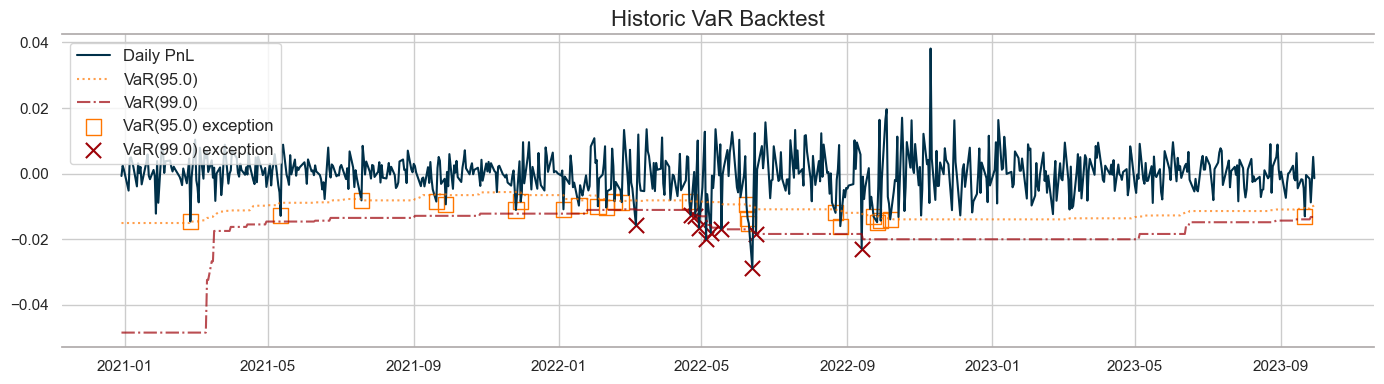

In [67]:
var.var_plot(bth)

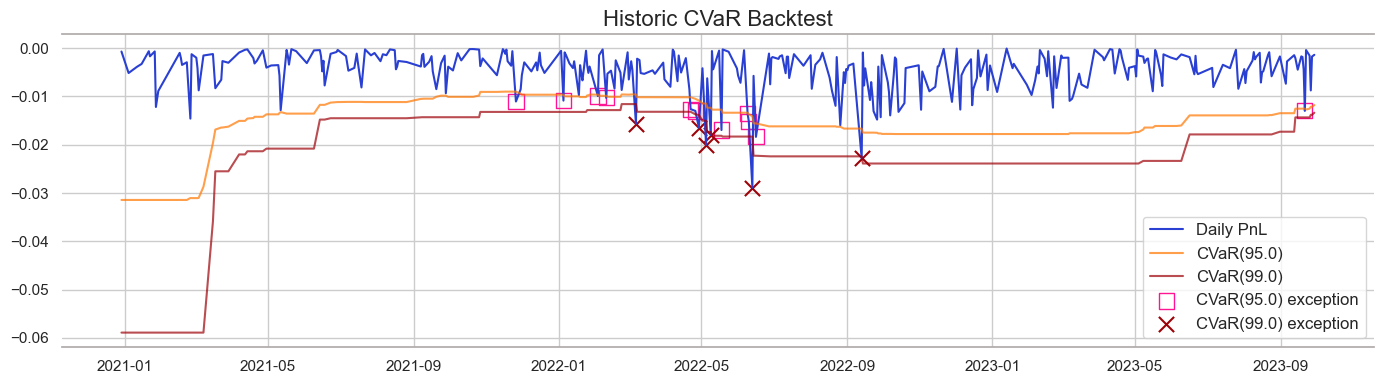

In [68]:
var.cvar_plot(bth)

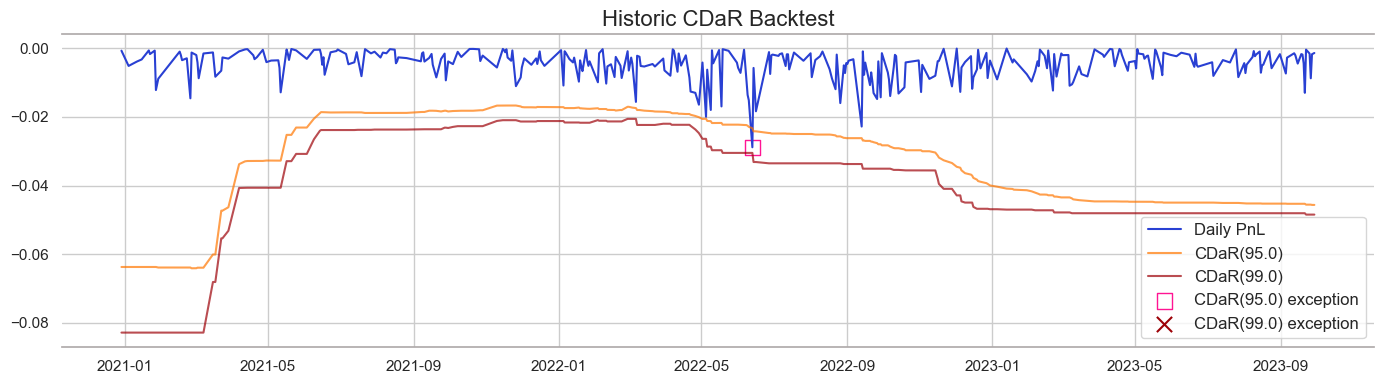

In [69]:
var.cdar_plot(bth)